# Import Libraries

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Download Input data set and Apply summary statistics

In [24]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       ])

In [25]:
train = datasets.MNIST('./data', train=True, download=True,  transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True,  transform=test_transforms)

In [26]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())
train_data_mean = torch.mean(train_data)
train_data_std = torch.std(train_data)
print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', train_data_mean)
print(' - std:', train_data_std)
print(' - var:', torch.var(train_data))

/Users/vehere/anaconda3/envs/torch-nightly/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


# Data Transformation
performed 2 basic transformations
1. ToTensor
2. Normalize

In [27]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize(train_data_std, train_data_std ), #(0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize(train_data_std, train_data_std ), #(0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [17]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders

In [28]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? False


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

/Users/vehere/anaconda3/envs/torch-nightly/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([64, 1, 28, 28])
torch.Size([64])


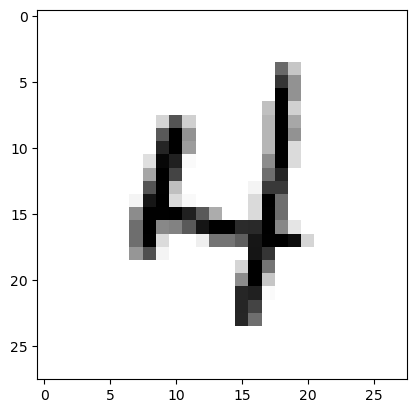

In [19]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

# Display a single Digit from MNIST dataset

torch.Size([64, 1, 28, 28])
torch.Size([64])


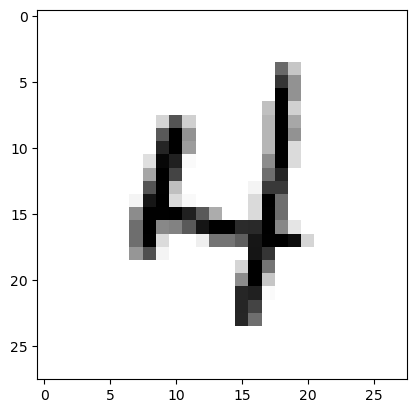

In [29]:

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

# Display an array of random images from dataset


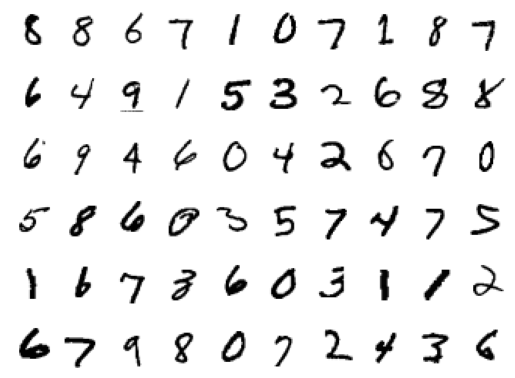

In [23]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Model Params

Can't emphasize on how important viewing Model Summary is. Unfortunately, there is no in-built model visualizer, so we have to take external help

In [30]:
!pip install torchsummary
from torchsummary import summary
from model import Net1
use_cuda = torch.cuda.is_available()
device = torch.device(use_cuda if use_cuda else "cpu")
print(device)
model = Net1().to(device)
summary(model, input_size=(1, 28, 28))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
---------------------------------

# Training and Testing

All right, so we have 6.3M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments.

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's write train and test functions

In [32]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))

# Train and test Net1 model

In [34]:
device = torch.device("mps")
model =  Net1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.07673630863428116 Batch_id=937 Accuracy=87.22: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:50<00:00, 18.74it/s]



Test set: Average loss: 0.0540, Accuracy: 9832/10000 (98.32%)

EPOCH: 1


Loss=0.0033244439400732517 Batch_id=937 Accuracy=98.44: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:47<00:00, 19.76it/s]



Test set: Average loss: 0.0340, Accuracy: 9879/10000 (98.79%)

EPOCH: 2


Loss=0.08850662410259247 Batch_id=937 Accuracy=99.00: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:47<00:00, 19.70it/s]



Test set: Average loss: 0.0339, Accuracy: 9894/10000 (98.94%)

EPOCH: 3


Loss=0.014126725494861603 Batch_id=937 Accuracy=99.22: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:45<00:00, 20.79it/s]



Test set: Average loss: 0.0268, Accuracy: 9916/10000 (99.16%)

EPOCH: 4


Loss=0.0003728195442818105 Batch_id=937 Accuracy=99.54: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:44<00:00, 20.91it/s]



Test set: Average loss: 0.0295, Accuracy: 9902/10000 (99.02%)

EPOCH: 5


Loss=0.010050453245639801 Batch_id=937 Accuracy=99.63: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:46<00:00, 19.96it/s]



Test set: Average loss: 0.0279, Accuracy: 9910/10000 (99.10%)

EPOCH: 6


Loss=0.00036506782635115087 Batch_id=937 Accuracy=99.71: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:51<00:00, 18.19it/s]



Test set: Average loss: 0.0291, Accuracy: 9912/10000 (99.12%)

EPOCH: 7


Loss=0.006115981377661228 Batch_id=937 Accuracy=99.70: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:49<00:00, 18.91it/s]



Test set: Average loss: 0.0300, Accuracy: 9920/10000 (99.20%)

EPOCH: 8


Loss=0.009489256888628006 Batch_id=937 Accuracy=99.83: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:51<00:00, 18.09it/s]



Test set: Average loss: 0.0291, Accuracy: 9916/10000 (99.16%)

EPOCH: 9


Loss=5.830549980601063e-06 Batch_id=937 Accuracy=99.88: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:45<00:00, 20.51it/s]



Test set: Average loss: 0.0296, Accuracy: 9922/10000 (99.22%)

EPOCH: 10


Loss=6.892598321428522e-05 Batch_id=937 Accuracy=99.86: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:46<00:00, 20.31it/s]



Test set: Average loss: 0.0305, Accuracy: 9911/10000 (99.11%)

EPOCH: 11


Loss=0.0006351503543555737 Batch_id=937 Accuracy=99.89: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:45<00:00, 20.44it/s]



Test set: Average loss: 0.0263, Accuracy: 9919/10000 (99.19%)

EPOCH: 12


Loss=6.969288733671419e-06 Batch_id=937 Accuracy=99.95: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:45<00:00, 20.59it/s]



Test set: Average loss: 0.0366, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


Loss=0.00010433533316245303 Batch_id=937 Accuracy=99.91: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:46<00:00, 20.05it/s]



Test set: Average loss: 0.0315, Accuracy: 9924/10000 (99.24%)

EPOCH: 14


Loss=8.572819751861971e-07 Batch_id=937 Accuracy=99.90: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:45<00:00, 20.55it/s]



Test set: Average loss: 0.0297, Accuracy: 9929/10000 (99.29%)

EPOCH: 15


Loss=0.011208131909370422 Batch_id=937 Accuracy=99.91: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:46<00:00, 20.28it/s]



Test set: Average loss: 0.0348, Accuracy: 9912/10000 (99.12%)

EPOCH: 16


Loss=2.2232522951526335e-06 Batch_id=937 Accuracy=99.95: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:46<00:00, 20.19it/s]



Test set: Average loss: 0.0291, Accuracy: 9926/10000 (99.26%)

EPOCH: 17


Loss=3.95227616536431e-05 Batch_id=937 Accuracy=100.00: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:45<00:00, 20.57it/s]



Test set: Average loss: 0.0322, Accuracy: 9924/10000 (99.24%)

EPOCH: 18


Loss=0.0001394555001752451 Batch_id=937 Accuracy=100.00: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:45<00:00, 20.56it/s]



Test set: Average loss: 0.0330, Accuracy: 9929/10000 (99.29%)

EPOCH: 19


Loss=3.1218489766615676e-06 Batch_id=937 Accuracy=99.95: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:47<00:00, 19.59it/s]



Test set: Average loss: 0.0291, Accuracy: 9932/10000 (99.32%)



# Train Vs Test Loss Plot

In [35]:
t = [t_items.item() for t_items in train_losses]

Text(0.5, 1.0, 'Test Accuracy')

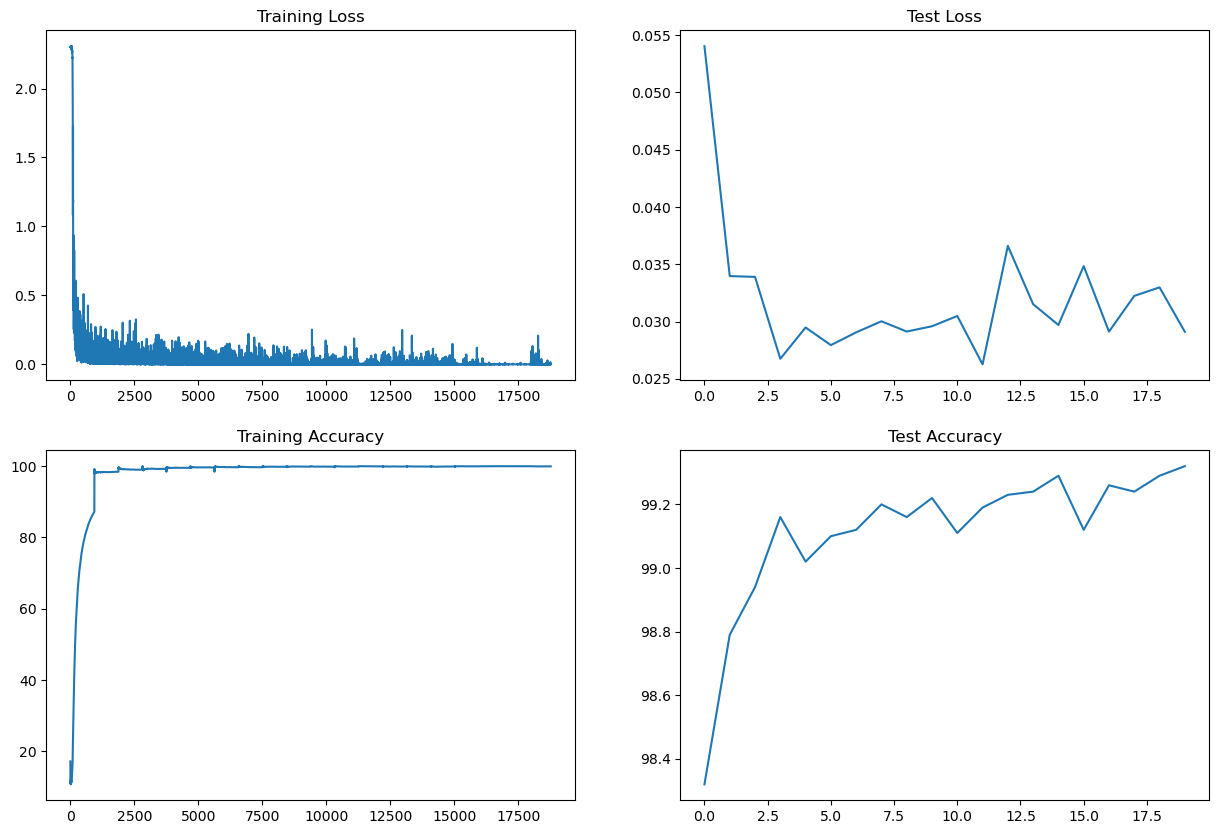

In [36]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

## Target:
* Get the set-up right <br>
* Set Transforms <br>
* Set Data Loader <br>
* Set Basic Working Code <br>
* Set Basic Training  & Test Loop <br>
* Plot Train vs Test Loss graph <br>
## Results:
* Parameters: 6.3M <br>
* Best Training Accuracy: 99.95 <br>
* Best Test Accuracy: 99.32 <br>
## Analysis:
* Net1 is heavy model for simplne MNIST digit classification. <br>
* The train accuracy is reached almost 100% and test accuracy is still 99.25% and there is not much scope to learn from train data and improve the test accuracy. <br>
* Model is over-fitting, we need to create a light weight robust model in next iteration. <br>

